In [24]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-06-15T18:46:40.944038-05:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [25]:
import pandas as pd
import numpy as np

La magia de matplotlib matplotlib notebook, es muy util para hacer plots mas visibles, pero es un poco complicada de usar ya que requiere el cerrar cada plot para poder continuar.

Alternativamente, se puede usar la magia %matplotlib inline, que es más sencilla ya que simplemente muestra el gráfico original en el jupyter notebook. Para modificar el tamaño de los plots en este caso basta con cambiar el parámetro general de matplotlib figure.figsize al tamaño de gráfico deseado (en pulgadas)


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 pulgadas de ancho y 10 de alto para todos los plots

En este apartado vamos a revisar el dataset. El objetivo sera tener un dataset lo mas parecido al original pero sin fallos en el mismo que puedan llevarnos a sacar conclusiones erroneas.

El input de este paso es el output del anterior

In [27]:
consumidores = pd.read_csv("C:/Users/Danny/Desktop/Analisis tesis/Analisis exploratorio de datos/data/consumidores.1.procesado_inicial.csv")

In [28]:
consumidores.shape

(10149, 57)

In [29]:
consumidores.head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,servicio_energia,estrato,...,g_11_j_consumio_alguna_vez_heroina,g_11_j_anios_consumio_heroina,k_03_consumio_marihuana_12m,k_04_frecuencia_consumo_marihuana_12m,l_02_consumio_cocaina_12m,l_03_frecuencia_consumo_cocaina_12m,m_02_consumio_basuco_12m,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m
0,11207,1,19,2,2,Guaviare,SAN JOSÉ DEL GUAVIARE,2,1,2.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4398,1,52,3,3,Caqueta,FLORENCIA,1,1,2.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4399,2,39,1,1,Bolivar,CARTAGENA,1,1,5.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2619,2,27,1,1,Tolima,ESPINAL,1,1,2.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duplicados

En este apartado se intentan ver dos cosas:

* Asegurarse de que datos que no debieran estar duplicados no lo están (por ejemplo, numeros de telefono)

* Revisar  si hay columnas que tengan un alto numero de duplicados, ya que pueden no aportar mucha informacion

In [30]:
consumidores['tipo_vivienda_unico'] = consumidores.tipo_vivienda.astype(str).str.cat([consumidores.servicio_energia.apply(str),consumidores.estrato.apply(str)],sep='-')

In [31]:
consumidores.tipo_vivienda_unico.value_counts()

1-1-2.0    2029
1-1-1.0    1908
2-1-2.0    1661
1-1-3.0    1284
2-1-3.0    1213
2-1-1.0     908
2-1-4.0     329
1-1-4.0     220
2-1-5.0     121
3-1-2.0     104
2-1-6.0      93
3-1-3.0      76
3-1-1.0      71
1-1-5.0      50
1-2-nan      16
1-1-6.0      16
3-1-4.0      12
4-1-1.0       8
1-1-8.0       8
1-1-9.0       7
2-1-9.0       5
2-2-nan       3
4-2-nan       2
4-1-2.0       2
2-1-8.0       1
3-2-nan       1
3-1-5.0       1
Name: tipo_vivienda_unico, dtype: int64

Nos damos cuenta de que hay muchos repetidos, veamos un ejemplo

In [32]:
consumidores[consumidores.tipo_vivienda_unico=='3-1-2.0'].head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,servicio_energia,estrato,...,g_11_j_anios_consumio_heroina,k_03_consumio_marihuana_12m,k_04_frecuencia_consumo_marihuana_12m,l_02_consumio_cocaina_12m,l_03_frecuencia_consumo_cocaina_12m,m_02_consumio_basuco_12m,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m,tipo_vivienda_unico
58,30872,2,26,2,2,Bogotá,"BOGOTÁ, D.C.",3,1,2.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-1-2.0
109,25635,1,19,2,2,Cauca,POPAYÁN,3,1,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3-1-2.0
143,27716,1,53,3,3,Cauca,POPAYÁN,3,1,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3-1-2.0
172,12626,2,40,3,2,Bogotá,"BOGOTÁ, D.C.",3,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-1-2.0
269,25423,1,36,2,2,Amazonas,LETICIA,3,1,2.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-1-2.0


Por lo tanto se puede observar que cada tipo de vivienda tiene diferentes valores a las columnas tenidas en cuenta 

Por lo tanto, solo vamos a considerar duplicados aquellos records que sean idénticos en todas sus columnas

In [33]:
consumidores[consumidores.duplicated()].shape

(0, 58)

De este modo se puede observar que no existen valores o filas duplicadas en el dataset que se esta analizando , sin embargo si existen valores nulos que se deben corregir

Borramos la columna `tipo_vivienda_unico`

In [34]:
del consumidores['tipo_vivienda_unico']

Ahora falta ver si hay variables en las que haya una gran cantidad de records que tengan el mismo valor (cardinalidad).

In [35]:
n_records = len(consumidores)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*n_records),3),
            round(menos_comun / (1.0*n_records),3),
            df[columna].dtype
        ))

valores_duplicados_col(consumidores)

directorio | 0.0-0.0 | int64
per_sexo | 0.504-0.496 | int64
per_edad | 0.031-0.008 | int64
vive_padre_hogar | 0.571-0.149 | int64
vive_madre_hogar | 0.535-0.166 | int64
departamento | 0.141-0.003 | object
municipio | 0.103-0.0 | object
tipo_vivienda | 0.546-0.001 | int64
servicio_energia | 0.998-0.002 | int64
estrato | 0.374-0.001 | float64
residentes_hogar | 0.244-0.0 | int64
d_01_aporta_dinero_hogar | 0.694-0.306 | int64
d_02_situacion_actual | 0.595-0.008 | int64
d_08_estado_salud | 0.6-0.01 | int64
d_09_deprimido | 0.74-0.003 | int64
d_10_poco_interes | 0.795-0.004 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.824-0.018 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.944-0.002 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.946-0.002 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.677-0.323 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.603-0.397 | int64
d2_01_etnia | 0.824-0.001 | int64
d2_03_estado_civil | 0

In [36]:
consumidores.k_03_consumio_marihuana_12m.value_counts(normalize=False)

2.0    2754
1.0    1223
9.0       5
Name: k_03_consumio_marihuana_12m, dtype: int64

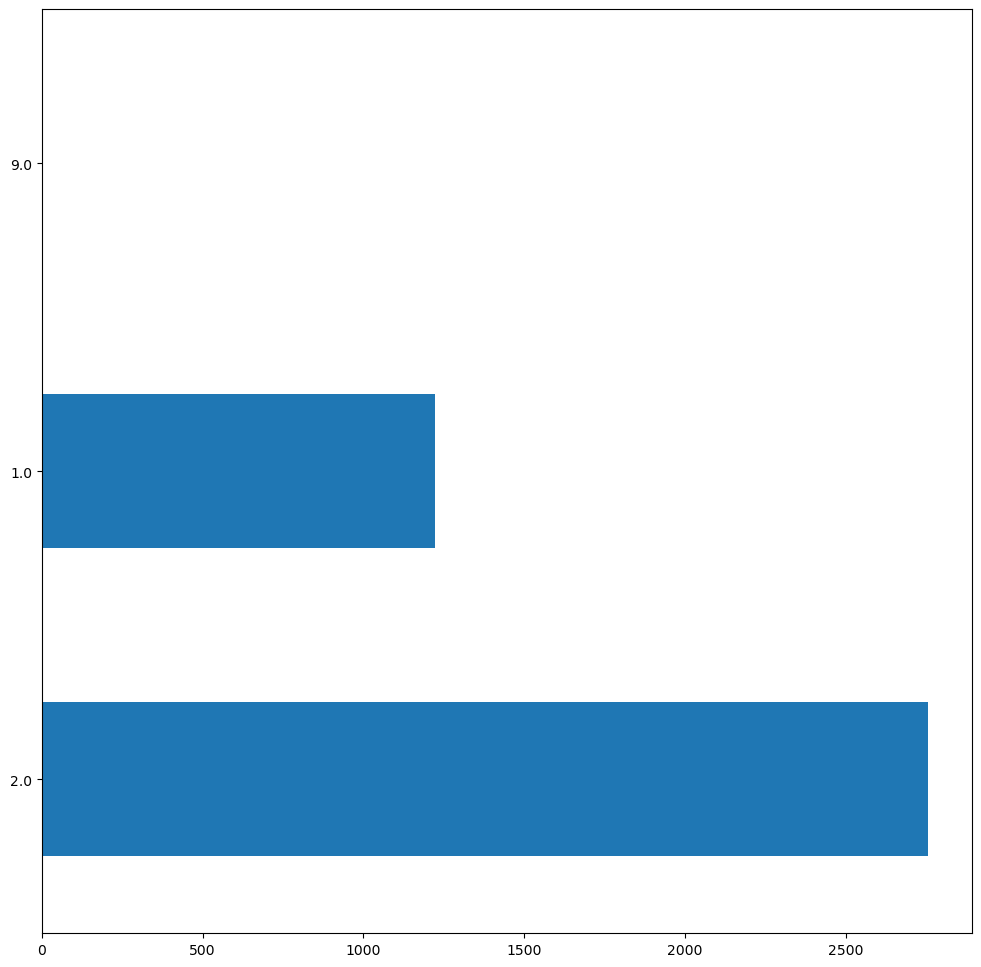

In [37]:
consumidores.k_03_consumio_marihuana_12m.value_counts(normalize=False).plot.barh();

In [38]:
consumidores[consumidores.vive_madre_hogar==9].shape

(0, 57)

### Valores inexistentes

In [39]:
n_records = len(consumidores)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(consumidores)

directorio | 0.0 | int64
per_sexo | 0.0 | int64
per_edad | 0.0 | int64
vive_padre_hogar | 0.0 | int64
vive_madre_hogar | 0.0 | int64
departamento | 0.0 | object
municipio | 0.0 | object
tipo_vivienda | 0.0 | int64
servicio_energia | 0.0 | int64
estrato | 0.0021677012513548134 | float64
residentes_hogar | 0.0 | int64
d_01_aporta_dinero_hogar | 0.0 | int64
d_02_situacion_actual | 0.0 | int64
d_08_estado_salud | 0.0 | int64
d_09_deprimido | 0.0 | int64
d_10_poco_interes | 0.0 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.0 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.0 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.0 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.0 | int64
d2_01_etnia | 0.0 | int64
d2_03_estado_civil | 0.0 | int64
d2_04_num_hijos | 0.0 | int64
d2_05_nivel_educativo | 0.0 | int64
g_01_familiares_consumen_sp | 0.0 | int64
g_01_a_num_familiares_consu

### Valores extremos (outliers)

Para detectar valores extremos una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o mas desviaciones standard de la media.

El z score se define como:

$$z(x)= \frac{x-\mu}{\sigma}$$

In [43]:
import sys
!{sys.executable} -m pip install numpy==1.23.4 --user

  Using cached numpy-1.23.4-cp310-cp310-win_amd64.whl (14.6 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.2.0 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [44]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object_:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(consumidores)

directorio | 0 | int64
per_sexo | 0 | int64
per_edad | 0 | int64
vive_padre_hogar | 0 | int64
vive_madre_hogar | 0 | int64
tipo_vivienda | 12 | int64
servicio_energia | 22 | int64
estrato | 0 | float64
residentes_hogar | 122 | int64
d_01_aporta_dinero_hogar | 0 | int64
d_02_situacion_actual | 315 | int64
d_08_estado_salud | 101 | int64
d_09_deprimido | 29 | int64
d_10_poco_interes | 37 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 179 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 571 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 544 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0 | int64
d2_01_etnia | 595 | int64
d2_03_estado_civil | 0 | int64
d2_04_num_hijos | 161 | int64
d2_05_nivel_educativo | 0 | int64
g_01_familiares_consumen_sp | 0 | int64
g_01_a_num_familiares_consumen_sp | 0 | float64
g_02_amigos_consumen_sp | 0 | int64
g_02_a_num_amigos_consumen_sp | 0 | float6

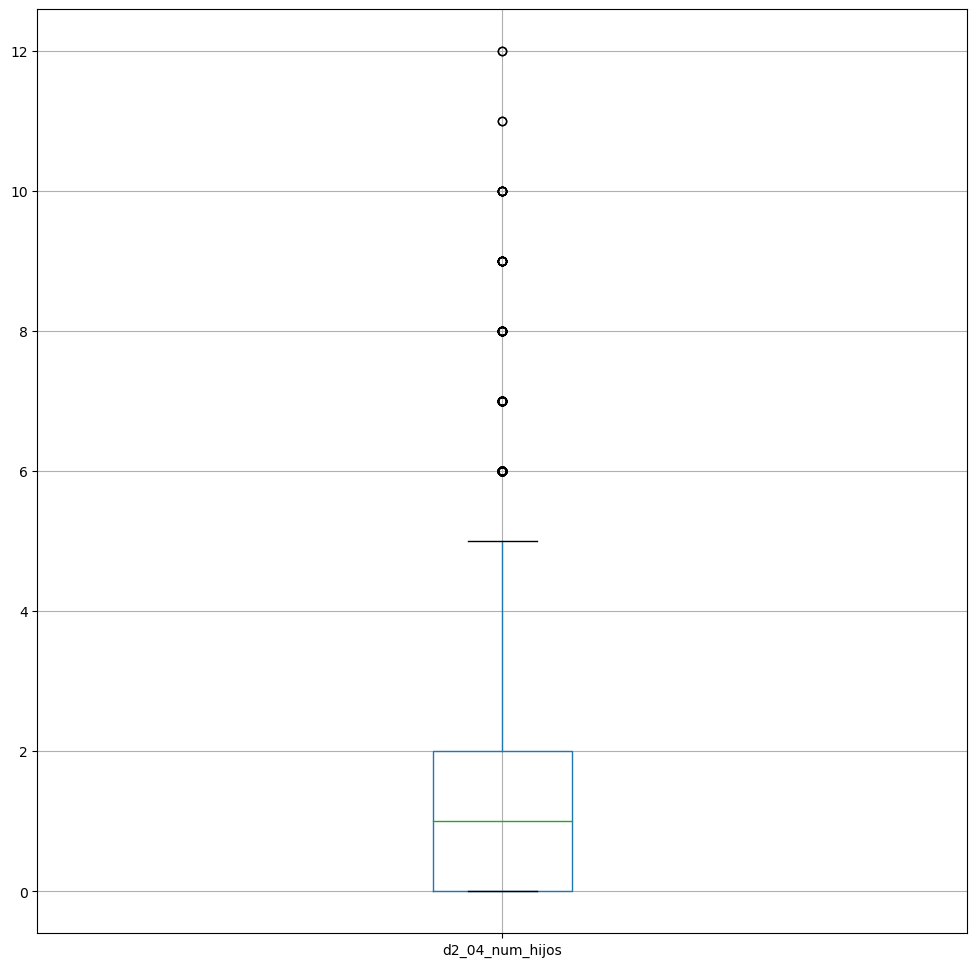

In [45]:
consumidores.boxplot(column='d2_04_num_hijos');

In [46]:
consumidores.k_04_frecuencia_consumo_marihuana_12m.value_counts(normalize=False)

5.0    340
2.0    302
4.0    216
3.0    207
1.0    145
9.0     13
Name: k_04_frecuencia_consumo_marihuana_12m, dtype: int64

Estado de alerta varibale de numero de hijos
vive_padre_hogar
vive_madre_hogar
d_09_deprimido
d_10_poco_interes
g_07_alguien_ofrecio_comprar_probar_sp

Se puede observar que existen ciertos valores en las respuestas que pueed que no ayuden al momento de entrenar el modelo, porende es necesario eliminar tales registros

In [47]:
aux_consumidores = consumidores[(consumidores.vive_madre_hogar!=9)]
aux_consumidores.shape

(10149, 57)

In [48]:
aux_consumidores = aux_consumidores[(aux_consumidores.vive_padre_hogar!=9)]
aux_consumidores.shape

(10149, 57)

In [49]:
aux_consumidores = aux_consumidores[(aux_consumidores.d_09_deprimido!=9)]
aux_consumidores.shape

(10120, 57)

In [50]:
aux_consumidores = aux_consumidores[(aux_consumidores.d_10_poco_interes!=9)]
aux_consumidores.shape

(10099, 57)

In [51]:
aux_consumidores = aux_consumidores[(aux_consumidores.g_07_alguien_ofrecio_comprar_probar_sp!=9)]
aux_consumidores.shape

(10069, 57)

In [52]:
aux_consumidores.g_07_alguien_ofrecio_comprar_probar_sp.value_counts(normalize=False)

2    5148
1    4921
Name: g_07_alguien_ofrecio_comprar_probar_sp, dtype: int64

Ahora se procedera a eliminar los registros cuyas respuestas no ayudan

In [53]:
aux_consumidores = aux_consumidores[(aux_consumidores.estrato!=9)]
aux_consumidores.shape

(10057, 57)

In [54]:
aux_consumidores = aux_consumidores[(aux_consumidores.d2_05_nivel_educativo!=9)]
aux_consumidores.shape

(10054, 57)

In [55]:
aux_consumidores = aux_consumidores[(aux_consumidores.k_03_consumio_marihuana_12m!=9)]
aux_consumidores.shape

(10049, 57)

In [56]:
aux_consumidores = aux_consumidores[(aux_consumidores.k_04_frecuencia_consumo_marihuana_12m!=9)]
aux_consumidores.shape

(10036, 57)

In [57]:
aux_consumidores = aux_consumidores[(aux_consumidores.l_02_consumio_cocaina_12m!=9)]
aux_consumidores.shape

(10034, 57)

In [58]:
aux_consumidores = aux_consumidores[(aux_consumidores.l_03_frecuencia_consumo_cocaina_12m!=9)]
aux_consumidores.shape

(10032, 57)

In [59]:
aux_consumidores = aux_consumidores[(aux_consumidores.m_02_consumio_basuco_12m!=9)]
aux_consumidores.shape

(10031, 57)

In [60]:
aux_consumidores = aux_consumidores[(aux_consumidores.m_03_frecuencia_consumo_basuco_12m!=9)]
aux_consumidores.shape

(10031, 57)

In [61]:
aux_consumidores = aux_consumidores[(aux_consumidores.o_02_consumio_heroina_12m!=9)]
aux_consumidores.shape

(10031, 57)

In [62]:
aux_consumidores = aux_consumidores[(aux_consumidores.o_03_frecuencia_consumo_heroina_12m!=9)]
aux_consumidores.shape

(10031, 57)

In [63]:
aux_consumidores = aux_consumidores.dropna(subset=['estrato'])
aux_consumidores.shape

(10009, 57)

In [64]:
aux_consumidores = aux_consumidores[(aux_consumidores.estrato!=8)]
aux_consumidores.shape

(10000, 57)

In [65]:
aux_consumidores.estrato.value_counts(normalize=False)

2.0    3755
1.0    2865
3.0    2547
4.0     555
5.0     170
6.0     108
Name: estrato, dtype: int64

Se elimina la columna de servicio de energia dado que ya no aporta informacion valiosa para el dataset

In [66]:
del aux_consumidores['servicio_energia']

Ya que hemos descubierto esto, volvamos a revisar los datos con el nuevo dataset

In [67]:
aux_consumidores.shape

(10000, 56)

In [68]:
outliers_col(aux_consumidores)

directorio | 0 | int64
per_sexo | 0 | int64
per_edad | 0 | int64
vive_padre_hogar | 0 | int64
vive_madre_hogar | 0 | int64
tipo_vivienda | 10 | int64
estrato | 108 | float64
residentes_hogar | 118 | int64
d_01_aporta_dinero_hogar | 0 | int64
d_02_situacion_actual | 310 | int64
d_08_estado_salud | 100 | int64
d_09_deprimido | 0 | int64
d_10_poco_interes | 0 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 174 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 558 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 534 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0 | int64
d2_01_etnia | 576 | int64
d2_03_estado_civil | 0 | int64
d2_04_num_hijos | 156 | int64
d2_05_nivel_educativo | 0 | int64
g_01_familiares_consumen_sp | 0 | int64
g_01_a_num_familiares_consumen_sp | 0 | float64
g_02_amigos_consumen_sp | 0 | int64
g_02_a_num_amigos_consumen_sp | 0 | float64
g_03_curiosidad_probar_sp | 

In [69]:
valores_duplicados_col(aux_consumidores)

directorio | 0.0-0.0 | int64
per_sexo | 0.496-0.49 | int64
per_edad | 0.03-0.008 | int64
vive_padre_hogar | 0.562-0.147 | int64
vive_madre_hogar | 0.526-0.164 | int64
departamento | 0.139-0.003 | object
municipio | 0.102-0.0 | object
tipo_vivienda | 0.537-0.001 | int64
estrato | 0.37-0.011 | float64
residentes_hogar | 0.241-0.0 | int64
d_01_aporta_dinero_hogar | 0.684-0.301 | int64
d_02_situacion_actual | 0.587-0.008 | int64
d_08_estado_salud | 0.591-0.01 | int64
d_09_deprimido | 0.732-0.253 | int64
d_10_poco_interes | 0.787-0.198 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.813-0.017 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.93-0.002 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.933-0.002 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.666-0.319 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.596-0.39 | int64
d2_01_etnia | 0.812-0.001 | int64
d2_03_estado_civil | 0.411-0.023 | int64
d2_04_num_hijos | 0.38

In [70]:
aux_consumidores.per_sexo.value_counts(normalize=False)

1    5029
2    4971
Name: per_sexo, dtype: int64

### Valores inexistentes

In [71]:
valores_inexistentes_col(aux_consumidores)

directorio | 0.0 | int64
per_sexo | 0.0 | int64
per_edad | 0.0 | int64
vive_padre_hogar | 0.0 | int64
vive_madre_hogar | 0.0 | int64
departamento | 0.0 | object
municipio | 0.0 | object
tipo_vivienda | 0.0 | int64
estrato | 0.0 | float64
residentes_hogar | 0.0 | int64
d_01_aporta_dinero_hogar | 0.0 | int64
d_02_situacion_actual | 0.0 | int64
d_08_estado_salud | 0.0 | int64
d_09_deprimido | 0.0 | int64
d_10_poco_interes | 0.0 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.0 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.0 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.0 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.0 | int64
d2_01_etnia | 0.0 | int64
d2_03_estado_civil | 0.0 | int64
d2_04_num_hijos | 0.0 | int64
d2_05_nivel_educativo | 0.0 | int64
g_01_familiares_consumen_sp | 0.0 | int64
g_01_a_num_familiares_consumen_sp | 0.7146516898216573 | float64
g_02_amigos

Ahora vemos que no hay valores inexistentes extremos en ninguna variable. La variable con mayor numero de valores inexistentes es g_11_j_anios_consumio_heroina (99%). Es de resaltar que es necesario agregar datos a la variable dado que esta variable tiene relacion con otra variable

### Conclusion
- NO hay records duplicados 
- La variable `servicio_energia, d_01_aporta_dinero_hogar, d_08_estado_salud(61%),d_09_deprimido,d_10_poco_interes,d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente,
d_11_k_conocimiento_riesgo_cocaina_frecuentemente,d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente,
d_12_b_presenta_problema_consumo_sp_barrio,d_12_c_presenta_problema_expendio_sp_barrio,d2_01_etnia,
g_01_familiares_consumen_sp,g_02_amigos_consumen_sp,g_03_curiosidad_probar_sp,g_04_probaria_sp,
g_05_posibilidad_probar_sp(50%),g_06_a_posibilidad_conseguir_marihuana(60%),g_06_j_posibilidad_conseguir_heroina(55%),
g_07_alguien_ofrecio_comprar_probar_sp(50%),g_11_f_consumio_alguna_vez_marihuana,g_11_g_consumio_alguna_vez_cocaina,
g_11_h_consumio_alguna_vez_basuco,g_11_j_consumio_alguna_vez_heroina ` tienen una clase dominante mayor al 65%
- hay un outlier en las variables `d_09_deprimido,d_10_poco_interes,g_07_alguien_ofrecio_comprar_probar_sp` y tabien hay datos inconsistentes
- Es necesario categoriazar las columnas g_11 a o_03, per_edad, estrato, situacion actual, edades
- Posibles para eliminar: d2_04_num_hijos
- Se descubre que la variable de estrato

### Exportamos

In [72]:
aux_consumidores.to_csv("C:/Users/Danny/Desktop/Analisis tesis/Analisis exploratorio de datos/data/consumidores.2.limpio_analisis.csv", index=False)